In [4]:
import scipy 
import torch 
import networkx as nx 
import numpy as np 
from matplotlib import pyplot as plt 

import sys 
sys.path.append('../')

from src.models.GSNN import GSNN
from src.models import utils 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


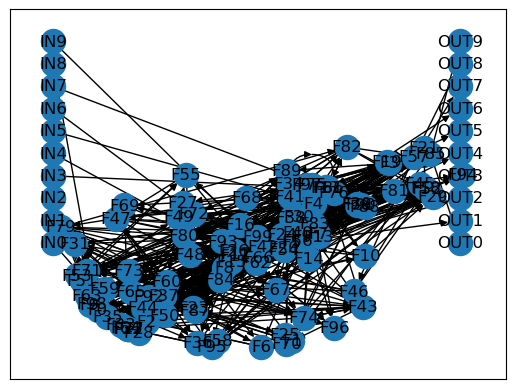

In [106]:
N_inputs = 10
N_funcs = 100
N_outputs = 10

N_func_edge_density = 0.05

G = nx.DiGraph()

for i in range(N_inputs): 
    G.add_edge(f'IN{i}',f'F{np.random.choice(np.arange(N_funcs))}')

for i in range(int(N_func_edge_density*N_funcs**2)): 
    G.add_edge(f'F{np.random.choice(np.arange(N_funcs))}', f'F{np.random.choice(np.arange(N_funcs))}', weight=np.random.randn(1)[0])

for i in range(N_outputs): 
    G.add_edge(f'F{np.random.choice(np.arange(N_funcs))}', f'OUT{i}')


pos = nx.spring_layout(G, 
                       pos={**{f'IN{i}':(-10, i*2) for i in range(N_inputs)}, **{f'OUT{i}':(10, i*2) for i in range(N_outputs)}, **{f'F{i}':(0,0) for i in range(N_funcs)}}, 
                       fixed=[f'IN{i}' for i in range(N_inputs)] + [f'OUT{i}' for i in range(N_outputs)], 
                       iterations=10,
                       k=0.1)
plt.figure()
nx.draw_networkx(G, pos=pos)
plt.show()

In [107]:
nodes = np.array(list(G.nodes()))
A = np.array(nx.adjacency_matrix(G).todense())

def func(x,t): 
    return (A @ x.reshape(-1,1)).ravel()

/tmp/ipykernel_17569/1207760622.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())


In [114]:
res = scipy.integrate.odeint(func, t=[10], y0=np.random.randn(len(nodes)))

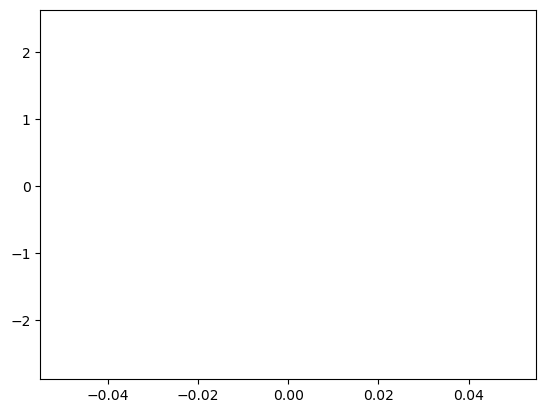

In [115]:
plt.figure()
plt.plot(res)
plt.show()